In [17]:
import pandas as pd
import numpy as np
import nltk
import random
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.data
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


In [18]:
songs=pd.read_csv("songdata (1).csv")

In [19]:
# songs.head()

In [20]:
# songs.drop('link',axis=1)

In [21]:
songs['text'] = songs['text'].str.replace(r'\n', '')
num=random.randrange(57000)
textin=songs['text'][num]

In [22]:
word=word_tokenize(textin)
stop_words = set(stopwords.words('english'))
filtered_sentence = []
for w in word:
    if w not in stop_words:
        filtered_sentence.append(w)

sen= ' '.join([str(elem) for elem in filtered_sentence])


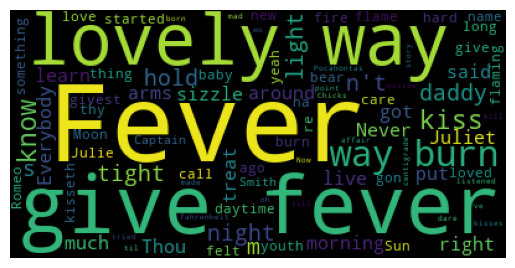

In [23]:
w = WordCloud().generate(sen)
plt.imshow(w)
plt.axis("off")
plt.show()

In [24]:
print("Artist:",songs['artist'][num],"\nSong:",songs['song'][num],"\n")
sid = SentimentIntensityAnalyzer()
pscore=sid.polarity_scores(textin)

print("Positivity Score:",pscore['pos']*100)
for word in filtered_sentence:
    comp = sid.polarity_scores(word)
    if(comp['pos']>0):
        print(word, end=" ")

print("\nNegativity Score:",pscore['neg']*100)
for word in filtered_sentence:
    comp = sid.polarity_scores(word)
    if(comp['neg']>0):
        print(word,end=" ")
print("\nNeutral Score:",pscore['neu']*100)

Artist: Boney M. 
Song: Fever 

Positivity Score: 17.299999999999997
love care kiss treat kiss loved yeah kisses treat kiss lovely kiss lovely lovely lovely lovely lovely lovely lovely lovely 
Negativity Score: 3.6999999999999997
hard fire mad kill misses 
Neutral Score: 79.0
